In [1]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 30)

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 1. 데이터 불러오기

In [2]:
path = os.getenv('HOME')+'/aiffel/DuSiData/data/'
file_list = os.listdir(path)
file_list

['test.csv', 'sample_submission.csv', 'train.csv']

In [3]:
test = pd.read_csv(path+file_list[0])
train = pd.read_csv(path+file_list[2])
sub = pd.read_csv(path+file_list[1])

In [4]:
# 그래프 시각화 시 모두 출력하지 않게 설정
def show_only(graph):
    if graph == True:
        InteractiveShell.ast_node_interactivity = 'last_expr'
    else:
        InteractiveShell.ast_node_interactivity = 'all'

# 2. EDA

## 2-1. 변수 기본정보

- `index`와 목적 변수 `credit`을 제외하면 변수 개수는 18개이다.

In [5]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

- `occyp_type`에만 결측치가 있다.
- 타 변수와 결합해서 채워보자

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [7]:
train.head()
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [8]:
# describe() 에서 최대값과 최솟값에 스타일을 지정
def min_and_max_row(col, props):
    return [ props
                if i=='max' or i== 'min'
                else ''
             for i,x in col.iteritems()]

In [9]:
train.describe().style.apply(min_and_max_row, props='color:white;background-color:darkblue')

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,187306.524493,-15958.053899,59068.750728,1.000000,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,101878.367995,4201.589022,137475.427503,0.000000,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,27000.000000,-25152.000000,-15713.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,121500.000000,-19431.000000,-3153.000000,1.000000,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,157500.000000,-15547.000000,-1539.000000,1.000000,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,225000.000000,-12446.000000,-407.000000,1.000000,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1575000.000000,-7705.000000,365243.000000,1.000000,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [10]:
train.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

## 2-2. 변수 의미 및 범위

|컬럼명|의미|값범위|
|-----|----------------------------------|--------------------|
|gender|성별|F/M|
|car|차 소유여부|N/Y|
|reality|부동산 소유여부|N/Y|
|child_num|자녀수|0~19|
|income_total|총 소득| 27000.0 ~ 1575000.0 |
|income_type|수입 유형|'Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student'|
|edu_type|최종학력|'Higher education' 'Secondary / secondary special' 'Incomplete higher' 'Lower secondary' 'Academic degree'|
|family_type|가족 유형|'Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow'|
|house_type|주거 유형|'Municipal apartment' 'House / apartment' 'With parents' 'Co-op apartment' 'Rented apartment' 'Office apartment'|
|DAYS_BIRTH|생년월일(데이터 수집 시점으로 부터 며칠 전인지)| -25152 ~ -7705 |
|DAYS_EMPLOYED|고용일자(데이터 수집 시점으로 부터 며칠 전인지) 직업이 없으면 365243| -15713 ~ 365243 |
|FLAG_MOBIL|휴대전화 소유 여부|1|
|work_phone|업무용 전화 소유 여부|0,1|
|phone|가정용 전화 소유 여부|0,1|
|email|이메일 여부|0,1|
|occyp_type|고용 유형|nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff' 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents' 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff' 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers' 'Waiters/barmen staff'|
|family_size|가족 크기| 1.0 ~ 20.0 |
|begin_month|카드 사용 시작 월| -60.0 ~ 0.0 |
|credit|신용도(낮을 수록 좋음)| 0.0,1.0,2.0 |

- `FLAG_MOBIL`은 모든 데이터가 다 1이어서 삭제해도 될 듯 하다.
- 연체 확률은 `income_total`과 `income_type`과 관련있지 않을까.

## 2-3. 범주형 변수 시각화
- 범주형 변수는 총 12개 이다.

In [11]:
categoric = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type','FLAG_MOBIL', 'work_phone','phone','email']

In [12]:
len(categoric)

12

In [13]:
for col in categoric:
    print(f'======== {col} 범주 종류 ========\n',train[col].unique())

======== gender 범주 종류 ========
 ['F' 'M']
======== car 범주 종류 ========
 ['N' 'Y']
======== reality 범주 종류 ========
 ['N' 'Y']
======== income_type 범주 종류 ========
 ['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
======== edu_type 범주 종류 ========
 ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
======== family_type 범주 종류 ========
 ['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
======== house_type 범주 종류 ========
 ['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']
======== occyp_type 범주 종류 ========
 [nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']
======== FLAG_MOBIL 범주 종류 =====

- 범주 개수가 적은 값들 끼리 시각화를 하자.

In [14]:
few_catogries = [cat for cat in train.columns if train[cat].nunique()<3]
few_catogries

['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone', 'email']

In [15]:
show_only(True)

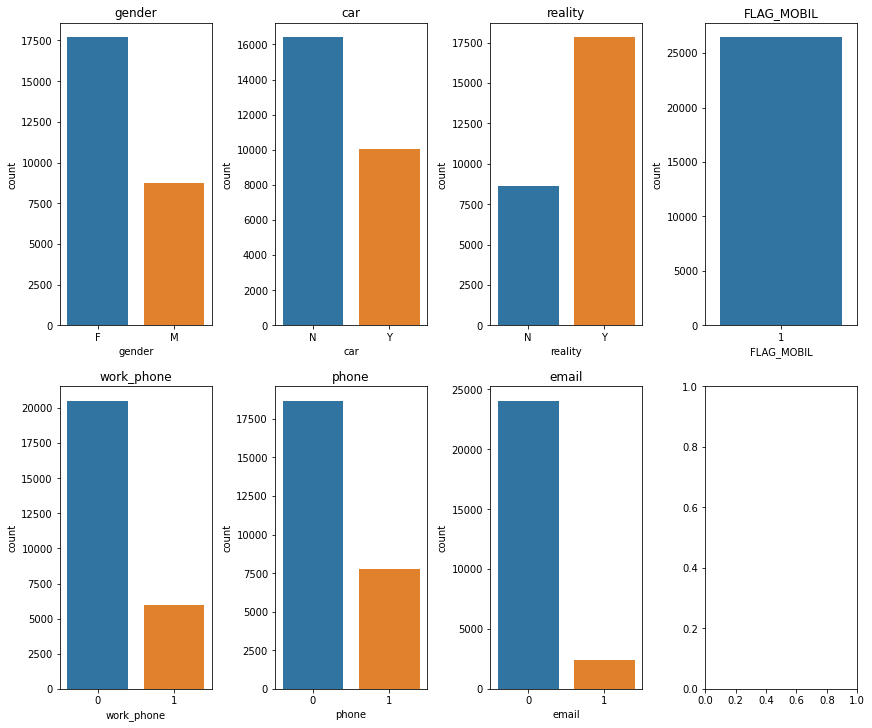

In [16]:
fig, ax = plt.subplots(2,4, figsize=(12,10), constrained_layout=True)
count = 0
for row in range(2):
    for col in range(4):
        if count == len(few_catogries): break
        sns.countplot(train[few_catogries[count]], ax=ax[row][col])
        ax[row][col].set_title(few_catogries[count])
        count += 1
plt.show()

- 여성 > 남성
- 차 미보유 > 차 보유
- 부동산 보유 > 부동산 미보유
- 업무용 전화 미보유 > 업무용 전화 보유
- 집 전화 미보유 > 집 전화 보유
- 이메일 미보유 > 이메일 보유

In [17]:
else_categories = [col for col in categoric if col not in few_catogries]
del else_categories[-1]
else_categories

['income_type', 'edu_type', 'family_type', 'house_type']

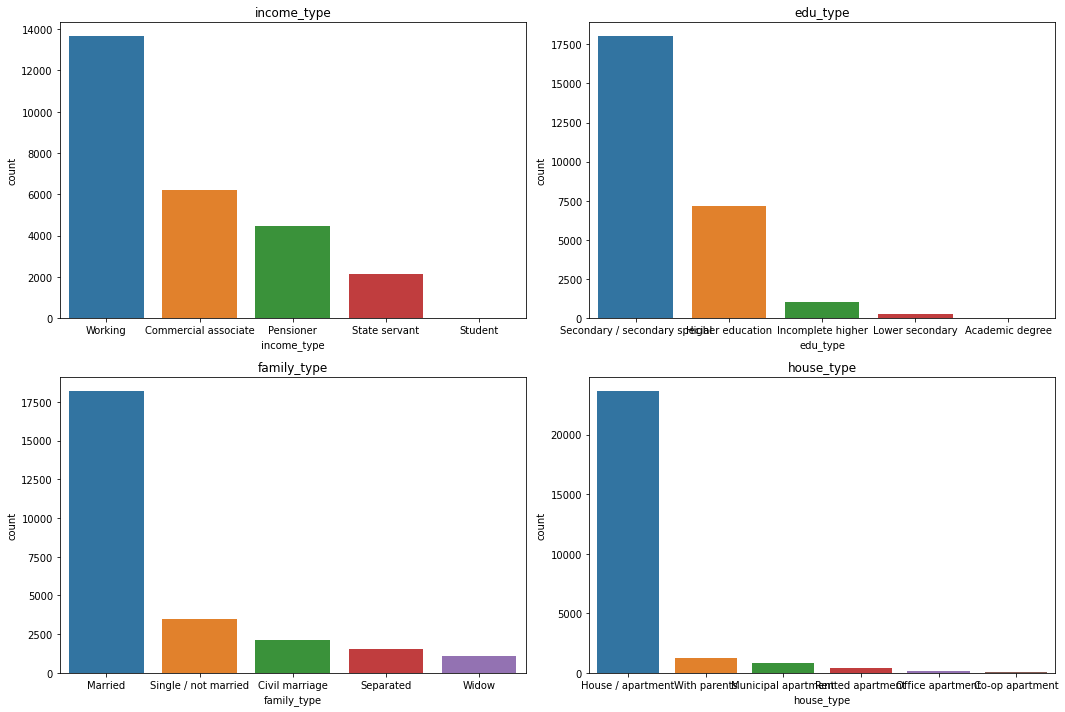

In [18]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
for row in range(1,5):
    if count == len(else_categories): break
    plt.subplot(2,2, row)
    sns.countplot(train[else_categories[row-1]], order = train[else_categories[row-1]].value_counts().index)
    plt.title(else_categories[row-1])
plt.tight_layout()
plt.show()

- 소득 유형은 `Working`이 가장 많다
- 최종 학력은 `Secondary/ secondary special`이 가장 많다.
- 가족 유형은 `Marriged`가 가장 많다. 그 뒤를 `Single/ not married`가 뒤따르고 있다.
- 주거 유형은 `House/ apartment`가 가장 많다.
- 직업 유형은 `Laborers`가 가장 많았고 그 뒤를 `Core Staff`와 `Sales Staff`가 이었다.

### 범주형 변수 범주별 상세 의미
- 수입 형태
    - 'Commercial associate' : 사업 소득? 은행?
    - 'Working' : 근로 소득
    - 'State servant' : 공무원
    - 'Pensioner': 연금 수급자 -> `occyp_type`에 nan이 절대적으로 많았음
    - 'Student' : 학생 신분
- 최종학력

    - 'Academic degree' : 학사 이상
    - 'Higher education' : 고등 교육
    - 'Incomplete higher' : 고등 교육 중퇴
    - 'Secondary / secondary special' : 중등교육
    - 'Lower secondary' : 중졸 이하
- 가족 유형

    - 'Married' : 기혼
    - 'Civil marriage' : 사실혼
    - 'Separated' : 별거
    - 'Single / not married' : 싱글
    - 'Widow': 사별

- 주거유형

    - 'Municipal apartment' : 공공 주택 (SH, LH 느낌)
    - 'House / apartment' : 집
    - 'With parents' : 부모님 집
    - 'Co-op apartment' : 공동 주택 (하우스쉐어)
    - 'Rented apartment' : 전세
    - 'Office apartment' : 오피스텔

- 고용 유형
    - nan
    - 'Laborers' : 노동자
    - 'Managers' : 관리자
    - 'Sales staff' : 판매원
    - 'High skill tech staff' : 고급 기술자
    - 'Core staff' : 임원
    - 'Drivers' : 운전기사
    - 'Medicine staff' : 의료계 종사자
    - 'Accountants' : 회계사
    - 'Realty agents' : 부동산 종사자
    - 'Security staff' : 보안
    - 'Cleaning staff' : 청소 종사자
    - 'Private service staff' :
    - 'Cooking staff' : 요식업계 종사자
    - 'Secretaries' : 비서
    - 'HR staff' : 인사
    - 'IT staff' : IT 종사자
    - 'Low-skill Laborers' : 하급 노동자
    - 'Waiters/barmen staff' : 종업원

## 2-4. 수치형 변수 시각화

In [19]:
# 범주형 변수가 아니었던 변수
numeric =  [col for col in train.columns if col not in categoric]
# index 변수는 제거
del numeric[0]
# 목적변수 credit도 제거
del numeric[-1]
numeric

['child_num',
 'income_total',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'family_size',
 'begin_month']

In [20]:
for col in numeric:
    print(f'{col} : ',train[col].min(),'~',train[col].max())
    print(f'{col} 평균 ',train[col].mean())

child_num :  0 ~ 19
child_num 평균  0.42865782212646936
income_total :  27000.0 ~ 1575000.0
income_total 평균  187306.52449257285
DAYS_BIRTH :  -25152 ~ -7705
DAYS_BIRTH 평균  -15958.053898779151
DAYS_EMPLOYED :  -15713 ~ 365243
DAYS_EMPLOYED 평균  59068.75072759572
family_size :  1.0 ~ 20.0
family_size 평균  2.196847715160449
begin_month :  -60.0 ~ 0.0
begin_month 평균  -26.123294402237594


In [21]:
show_only(False)

In [22]:
for col in numeric:
    train[col].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

135000.0    3164
157500.0    2233
180000.0    2225
112500.0    2178
225000.0    2170
            ... 
227250.0       1
91530.0        1
39600.0        1
432000.0       1
215100.0       1
Name: income_total, Length: 249, dtype: int64

-12676    40
-15519    38
-14667    32
-15140    26
-16768    24
          ..
-23117     1
-21070     1
-11175     1
-15269     1
-19490     1
Name: DAYS_BIRTH, Length: 6621, dtype: int64

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-5095         1
-3294         1
-1045         1
-7192         1
-12278        1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

-7.0     662
-11.0    617
-8.0     612
-3.0     593
-10.0    591
        ... 
-58.0    244
-59.0    242
-60.0    235
 0.0     231
-57.0    228
Name: begin_month, Length: 61, dtype: int64

In [77]:
show_only(True)

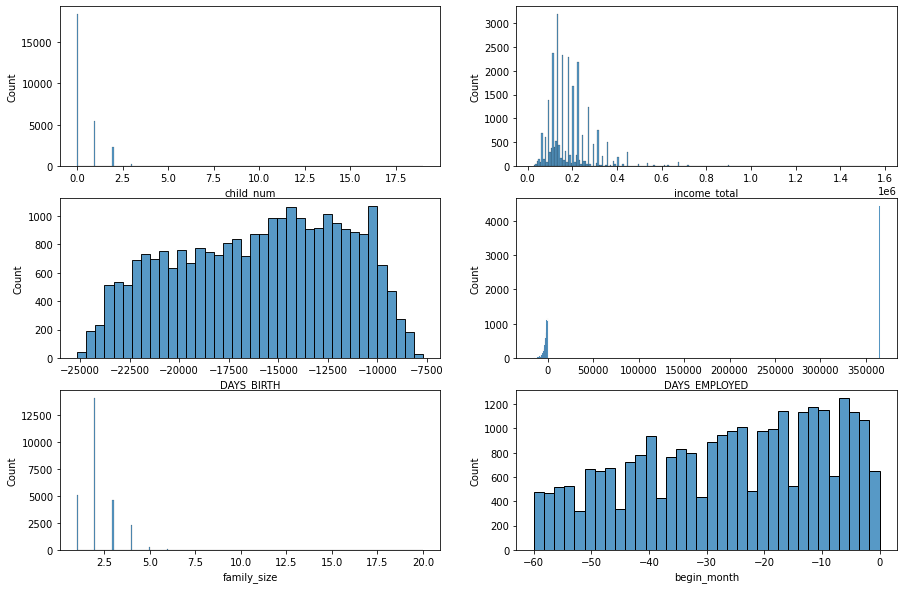

In [24]:
fig, ax = plt.subplots(3,2, figsize=(15,10))
for idx, col in enumerate(numeric,1):
    plt.subplot(3, 2, idx)
    sns.histplot(train[col])
plt.tight_layout
plt.show()

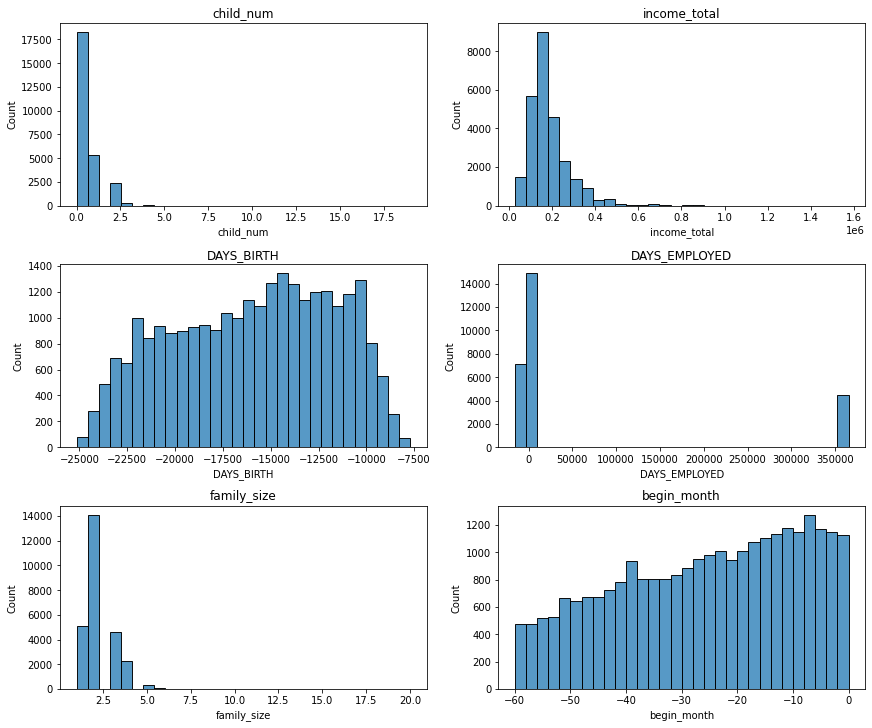

In [25]:
fig, ax = plt.subplots(3,2, figsize=(12,10), constrained_layout=True)
count = 0
for row in range(3):
    for col in range(2):
        if count == len(numeric): break
        sns.histplot(train[numeric[count]], bins=30,ax=ax[row][col])
        ax[row][col].set_title(numeric[count])
        count+=1
plt.show()

- `child_num`의 경우 대부분이 5 미만의 수를 보여주고 있었는데 몇몇 이상치가 존재했다.
- `family_size`와 `income_total` 역시 꼬리가 긴 모습을 보여주고 있다.
- `DAYS_EMPLOYED`에서 미취업자의 경우 `365247`의 값이 부여되어있다.

## 2-5. 목적변수

- 신용등급이 낮은 고객의 수가 월등히 많았다.

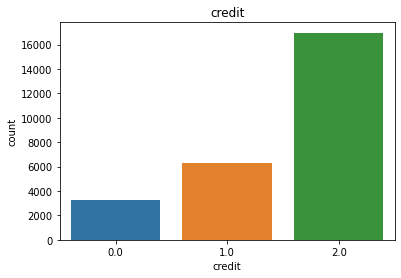

In [26]:
y = train['credit']
sns.countplot(y)
plt.title('credit')
plt.show()

In [52]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings('ignore')

model = ols('credit ~ C(gender) +C(car) +C(reality) +C(income_type) +C(edu_type) +C(family_type) +C(house_type) +C(occyp_type) +C(FLAG_MOBIL) +C(work_phone) +C(phone) +C(email)',train).fit()
print(anova_lm(model))

                     df       sum_sq   mean_sq         F    PR(>F)
C(gender)           1.0     0.232766  0.232766  0.469432  0.493257
C(car)              1.0     0.140088  0.140088  0.282524  0.595058
C(reality)          1.0     0.055879  0.055879  0.112694  0.737101
C(income_type)      4.0     3.298459  0.824615  1.663046  0.155501
C(edu_type)         4.0     3.251243  0.812811  1.639240  0.161287
C(family_type)      4.0     0.722740  0.180685  0.364398  0.834123
C(house_type)       5.0     2.115169  0.423034  0.853155  0.511839
C(occyp_type)      17.0    16.333258  0.960780  1.937658  0.011524
C(FLAG_MOBIL)       0.0     0.000000       NaN       NaN       NaN
C(work_phone)       1.0     0.361008  0.361008  0.728065  0.393522
C(phone)            1.0     0.233130  0.233130  0.470166  0.492920
C(email)            1.0     2.991377  2.991377  6.032876  0.014051
Residual        18245.0  9046.710961  0.495846       NaN       NaN


## 2-6. 나이 파생변수 생성
- `DAYS_BIRTH`로 나이 변수를 생성해보자
- `age` : 나이
- `age_group` : 연령대

In [28]:
train['age'] = abs(train['DAYS_BIRTH'])//365
train.sample(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
12729,12729,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19881,-7718,1,0,0,0,Secretaries,2.0,-22.0,2.0,54
9220,9220,F,N,N,0,81000.0,Working,Secondary / secondary special,Civil marriage,With parents,-11978,-2780,1,0,1,0,Sales staff,2.0,-12.0,0.0,32
1846,1846,M,Y,Y,0,198000.0,Working,Secondary / secondary special,Married,House / apartment,-21111,-1159,1,0,0,0,Drivers,2.0,-25.0,2.0,57


In [29]:
train['age_group'] = train['age']//10
train.loc[:4,['age','age_group']]

,age,age_group
0,38,3
1,31,3
2,52,5
3,41,4
4,41,4


## 2-7. 목적변수 -  독립변수 간 관계 확인
- 원래 범주별 스케일 차이에 따른 차이일 뿐 비율 차이가 크게 발생하지는 않았다.

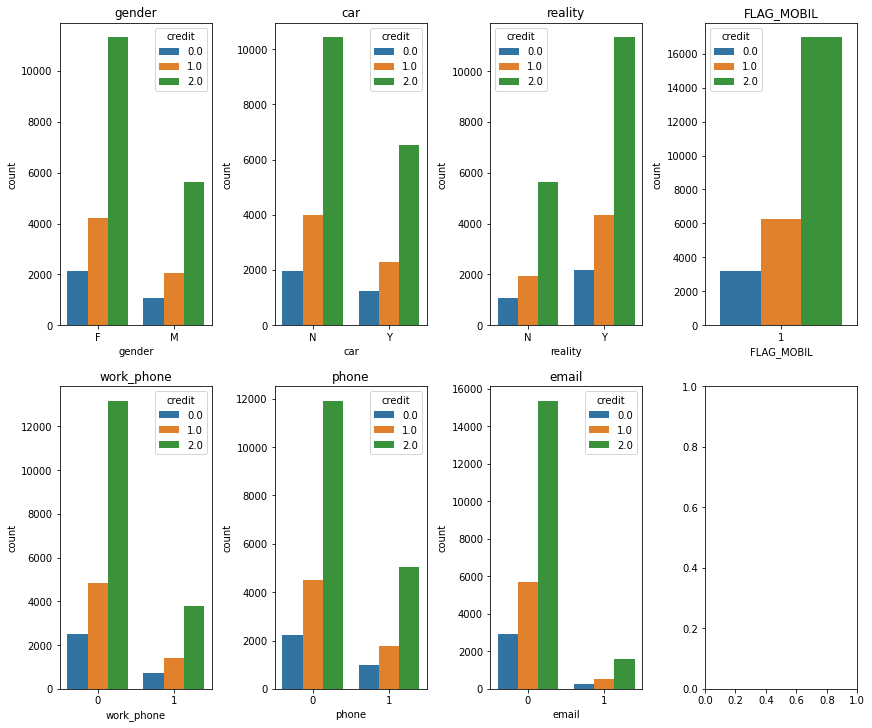

In [30]:
fig, ax = plt.subplots(2,4, figsize=(12,10), constrained_layout=True)
count = 0
for row in range(2):
    for col in range(4):
        if count == len(few_catogries): break
        sns.countplot(train[few_catogries[count]],hue=train['credit'], ax=ax[row][col])
        ax[row][col].set_title(few_catogries[count])
        count += 1
plt.show()

- 상관관계 행렬을 분석했을 때도 같았다.

<AxesSubplot:>

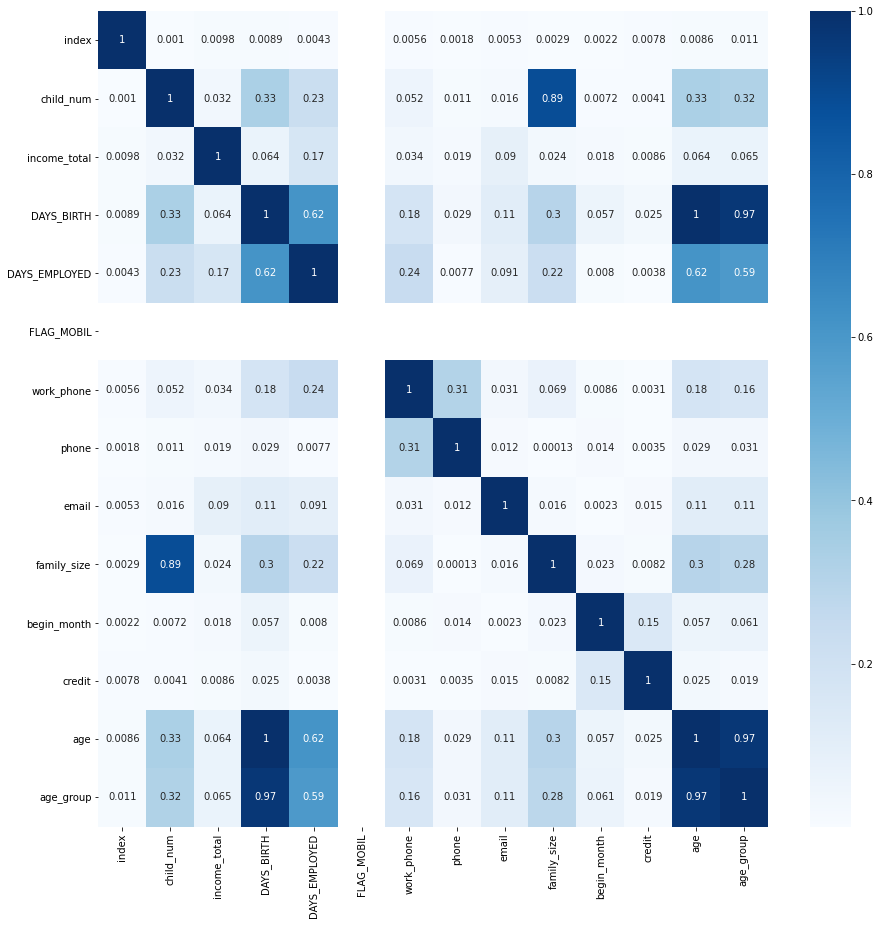

In [31]:
fig = plt.figure(figsize=(15,15))
corr_matrix = train.corr().abs()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(corr_matrix, cmap='Blues',annot=True)

# 3. 결측치 채우기

## 3-1. 결측치 확인

In [33]:
missing = train[train['occyp_type'].isna()]
missing

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,age_group
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,38,3
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0,41,4
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0,62,6
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0,63,6
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0,37,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0,52,5
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0,66,6
26443,26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,1,0,0,0,NaN,1.0,-21.0,1.0,61,6
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0,28,2


### 범주형 변수별 신용도

In [34]:
show_only(False)

In [35]:
for cat in categoric:
    if cat == 'occyp_type':continue
    print(f'=========== {cat} ===========')
    print('원 데이터 분포')
    pd.crosstab(train[cat],train['credit'],margins=True).style.background_gradient(cmap='PuBuGn')
    print('nan 데이터 분포')
    pd.crosstab(missing[cat],missing['credit'],margins=True).style.background_gradient(cmap='PuBuGn')

=========== gender ===========
원 데이터 분포


credit,0.0,1.0,2.0,All
gender,,,,
F,2148,4220,11329,17697
M,1074,2047,5639,8760
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
gender,,,,
F,760,1479,4110,6349
M,207,459,1156,1822
All,967,1938,5266,8171


=========== car ===========
원 데이터 분포


credit,0.0,1.0,2.0,All
car,,,,
N,1982,3990,10438,16410
Y,1240,2277,6530,10047
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
car,,,,
N,711,1369,3720,5800
Y,256,569,1546,2371
All,967,1938,5266,8171


=========== reality ===========
원 데이터 분포


credit,0.0,1.0,2.0,All
reality,,,,
N,1064,1935,5628,8627
Y,2158,4332,11340,17830
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
reality,,,,
N,252,545,1562,2359
Y,715,1393,3704,5812
All,967,1938,5266,8171


=========== income_type ===========
원 데이터 분포


credit,0.0,1.0,2.0,All
income_type,,,,
Commercial associate,782,1344,4076,6202
Pensioner,536,1084,2829,4449
State servant,265,489,1400,2154
Student,0,3,4,7
Working,1639,3347,8659,13645
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
income_type,,,,
Commercial associate,115,225,686,1026
Pensioner,536,1084,2820,4440
State servant,52,82,258,392
Student,0,0,1,1
Working,264,547,1501,2312
All,967,1938,5266,8171


=========== edu_type ===========
원 데이터 분포


credit,0.0,1.0,2.0,All
edu_type,,,,
Academic degree,2,7,14,23
Higher education,909,1751,4502,7162
Incomplete higher,114,246,660,1020
Lower secondary,28,59,170,257
Secondary / secondary special,2169,4204,11622,17995
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
edu_type,,,,
Academic degree,0,2,11,13
Higher education,257,492,1225,1974
Incomplete higher,27,74,199,300
Lower secondary,14,28,82,124
Secondary / secondary special,669,1342,3749,5760
All,967,1938,5266,8171


=========== family_type ===========
원 데이터 분포


credit,0.0,1.0,2.0,All
family_type,,,,
Civil marriage,288,539,1296,2123
Married,2213,4140,11843,18196
Separated,193,349,997,1539
Single / not married,402,940,2154,3496
Widow,126,299,678,1103
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
family_type,,,,
Civil marriage,89,168,310,567
Married,602,1237,3616,5455
Separated,61,99,308,468
Single / not married,132,241,613,986
Widow,83,193,419,695
All,967,1938,5266,8171


=========== house_type ===========
원 데이터 분포


credit,0.0,1.0,2.0,All
house_type,,,,
Co-op apartment,14,30,66,110
House / apartment,2873,5569,15211,23653
Municipal apartment,110,160,548,818
Office apartment,24,48,118,190
Rented apartment,50,147,232,429
With parents,151,313,793,1257
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
house_type,,,,
Co-op apartment,2,1,5,8
House / apartment,906,1744,4891,7541
Municipal apartment,20,56,155,231
Office apartment,2,9,32,43
Rented apartment,9,57,40,106
With parents,28,71,143,242
All,967,1938,5266,8171


=========== FLAG_MOBIL ===========
원 데이터 분포


credit,0.0,1.0,2.0,All
FLAG_MOBIL,,,,
1,3222,6267,16968,26457
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
FLAG_MOBIL,,,,
1,967,1938,5266,8171
All,967,1938,5266,8171


=========== work_phone ===========
원 데이터 분포


credit,0.0,1.0,2.0,All
work_phone,,,,
0,2493,4844,13174,20511
1,729,1423,3794,5946
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
work_phone,,,,
0,861,1711,4631,7203
1,106,227,635,968
All,967,1938,5266,8171


=========== phone ===========
원 데이터 분포


credit,0.0,1.0,2.0,All
phone,,,,
0,2245,4510,11917,18672
1,977,1757,5051,7785
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
phone,,,,
0,655,1420,3649,5724
1,312,518,1617,2447
All,967,1938,5266,8171


=========== email ===========
원 데이터 분포


credit,0.0,1.0,2.0,All
email,,,,
0,2953,5724,15365,24042
1,269,543,1603,2415
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
email,,,,
0,907,1821,4915,7643
1,60,117,351,528
All,967,1938,5266,8171


- 직업이 `nan`인 샘플을 분석해보면 전반적으로 원 데이터의 분포와 비슷한 분포를 보여주고 있었다.
- 그 중에서 원 데이터의 분포와 유의미한 차이를 보이는 변수는 `income_type` 이었다.
- 소득 유형은 전체 데이터의 절반 이상이 연금 수령자 `Pensioner`였다.
- 아예 직업 유형에 연금수령자 카테고리를 생성해 주는 것도 좋을 것 같다.

In [36]:
print('원 데이터 분포')
pd.crosstab(train['income_type'],train['credit'],margins=True).style.background_gradient(cmap='PuBuGn')
print('nan 데이터 분포')
pd.crosstab(missing['income_type'],missing['credit'],margins=True).style.background_gradient(cmap='PuBuGn')

원 데이터 분포


credit,0.0,1.0,2.0,All
income_type,,,,
Commercial associate,782,1344,4076,6202
Pensioner,536,1084,2829,4449
State servant,265,489,1400,2154
Student,0,3,4,7
Working,1639,3347,8659,13645
All,3222,6267,16968,26457


nan 데이터 분포


credit,0.0,1.0,2.0,All
income_type,,,,
Commercial associate,115,225,686,1026
Pensioner,536,1084,2820,4440
State servant,52,82,258,392
Student,0,0,1,1
Working,264,547,1501,2312
All,967,1938,5266,8171


## 3-2. 결측치 채우기

### `Pensioner` 중 직업이 있는 사람이 있는가?
- 전체 4449명의 `Pensioner` 중에 직업이 존재하는 경우는 9개뿐!

In [32]:
train[train['income_type']=='Pensioner'].count()

index            4449
gender           4449
car              4449
reality          4449
child_num        4449
income_total     4449
income_type      4449
edu_type         4449
family_type      4449
house_type       4449
DAYS_BIRTH       4449
DAYS_EMPLOYED    4449
FLAG_MOBIL       4449
work_phone       4449
phone            4449
email            4449
occyp_type          9
family_size      4449
begin_month      4449
credit           4449
dtype: int64

- 소득 유형이 연금수급인 사람들의 고용 형태

In [33]:
train[train['income_type']=='Pensioner']['occyp_type'].value_counts()

Laborers          3
Core staff        2
Drivers           1
Managers          1
Accountants       1
Medicine staff    1
Name: occyp_type, dtype: int64

### 소득 유형이 연금수급인 사람의 고용일자

In [34]:
train[train['income_type']=='Pensioner']['DAYS_EMPLOYED'].value_counts()

 365243    4438
-620          1
-672          1
-2208         1
-443          1
-5521         1
-3680         1
-198          1
-586          1
-2745         1
-673          1
-1325         1
Name: DAYS_EMPLOYED, dtype: int64

- 고용 형태가 있었던 사람은 9명이었는데 고용일자가 존재하는 사람은 11명이다.

In [123]:
train[(train['income_type']=='Pensioner') & (train['DAYS_EMPLOYED']!=365243)]['DAYS_EMPLOYED'].count()

11

- 2개의 샘플은 고용 형태는 없는데 고용일자가 존재한다.

In [35]:
train[(train['income_type']=='Pensioner') & (train['occyp_type'].isna()) & (train['DAYS_EMPLOYED']!=365243)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
6743,6743,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,NaN,2.0,-36.0,2.0
15682,15682,F,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20352,-673,1,0,1,0,NaN,2.0,-20.0,2.0


- 이 두 샘플을 제거하고 나머지 직업유형이 결측치인 연금수급자들은 `Pensioner`라는 새로운 고용 유형을 부여하면 될 것이다.

### 직업 유형이 결측치이면서 고용일자가 있는 샘플
- 전체 결측치 8171개 중 소득 유형이 `Pensioner` 였던 4440개의 샘플을 제외한 3722명이 전부 고용일자는 존재하는데 직업 유형이 nan이다.

In [121]:
train[(train['occyp_type'].isna()) & (train['DAYS_EMPLOYED']!=365243)]['index'].count()
train[(train['occyp_type'].isna()) & (train['DAYS_EMPLOYED']!=365243)]

3733

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,age_group
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,38,3
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0,41,4
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0,37,3
20,20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19850,-1753,1,0,1,0,NaN,2.0,-35.0,2.0,54,5
23,23,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-14542,-444,1,1,1,1,NaN,2.0,-18.0,2.0,39,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26433,26433,F,Y,N,0,121500.0,State servant,Higher education,Married,House / apartment,-19912,-4973,1,0,1,0,NaN,2.0,-31.0,2.0,54,5
26435,26435,F,N,N,1,126000.0,Working,Secondary / secondary special,Widow,House / apartment,-19691,-473,1,0,0,0,NaN,2.0,-40.0,2.0,53,5
26437,26437,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13015,-3647,1,0,0,0,NaN,2.0,-13.0,2.0,35,3
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0,28,2


### 직업 유형이 결측치이면서 고용시작일자가 있는 경우
- `Working`, `Commercial associate`, `State servent`의 경우 직업 유형이 누락되었을 가능성이 있다.
- 각 소득유형별 `income_total`의 평균을 통해 같은 소득 유형이면서 전체 소득이 비슷한 샘플들의 직업으로 채우자.

In [38]:
# 총 3733명의 직업 유형은 결측치이면서 고용시작일이 있는 경우가 존재한다.
train[(train['occyp_type'].isna()) & (train['DAYS_EMPLOYED']!=365243)]['income_type'].count()

3733

In [104]:
train[(train['occyp_type'].isna()) & (train['DAYS_EMPLOYED']!=365243)]['income_type'].value_counts()

Working                 2312
Commercial associate    1026
State servant            392
Pensioner                  2
Student                    1
Name: income_type, dtype: int64

### 소득 유형이 `Working`인 경우의 고용 형태

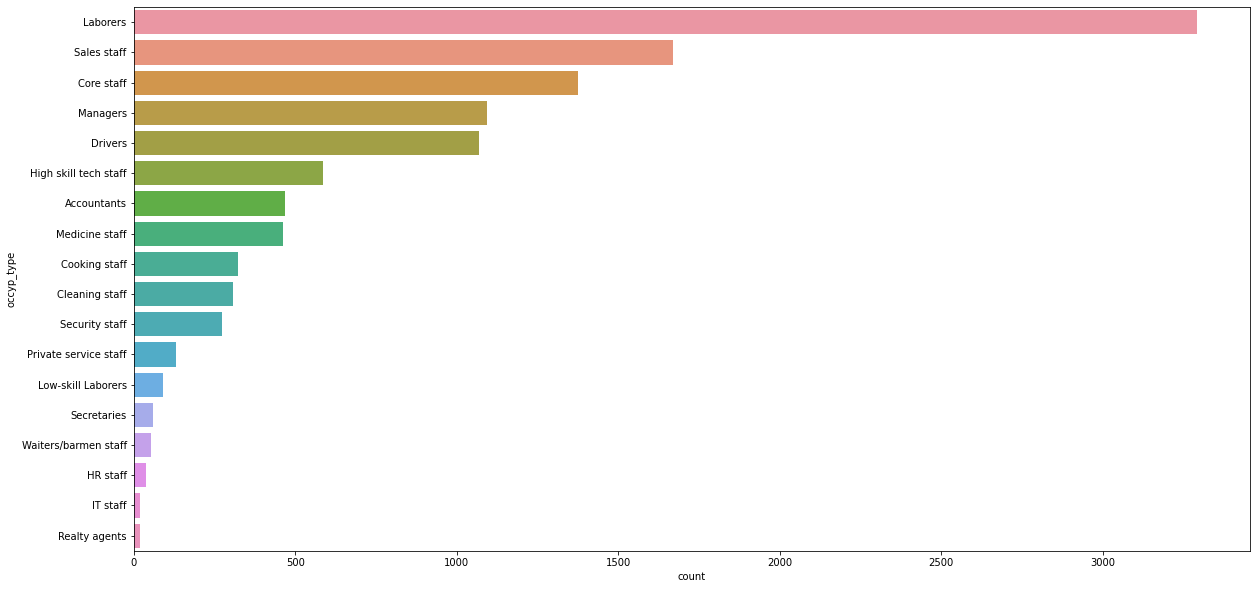

In [107]:
plt.figure(figsize=(20,10))
sns.countplot(data=train[train['income_type']=='Working'], y='occyp_type',order=train[train['income_type']=='Working']['occyp_type'].value_counts().index)
plt.tight_layout
plt.show()

In [109]:
# 고용형태에 따른 income_total 평균
train.groupby('occyp_type')['income_total'].mean()

occyp_type
Accountants              204651.942905
Cleaning staff           148209.677419
Cooking staff            146275.601751
Core staff               191473.629252
Drivers                  210853.714286
HR staff                 186387.096774
High skill tech staff    196602.403846
IT staff                 196770.731707
Laborers                 180307.189827
Low-skill Laborers       135708.661417
Managers                 278735.249654
Medicine staff           167212.364583
Private service staff    198018.518519
Realty agents            246357.142857
Sales staff              174955.579756
Secretaries              163716.494845
Security staff           180252.594340
Waiters/barmen staff     159822.580645
Name: income_total, dtype: float64

In [ ]:
show_only(False)

(27000.0, 1575000.0)

<AxesSubplot:xlabel='income_total', ylabel='Count'>

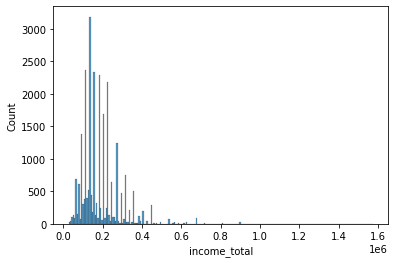

In [117]:
train['income_total'].min(), train['income_total'].max()
sns.histplot(train['income_total'])

- 고용형태가 nan인 경우의 `income_total`은 전체 집단에 비해 고소득이 적었다.

(29250.0, 900000.0)

<AxesSubplot:xlabel='income_total', ylabel='Count'>

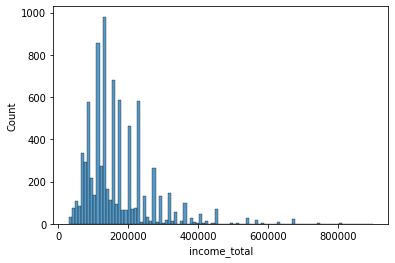

In [119]:
train[train['occyp_type'].isna()]['income_total'].min(),train[train['occyp_type'].isna()]['income_total'].max()
# 고용형태가 nan인 경우의 income_total
sns.histplot(train[(train['occyp_type'].isna())]['income_total'])

- 소득 유형이 `Working`이면서 고용 유형이 `nan`인 경우는 고용 유형의 `income_total`의 평균값을 채우자.

### 소득 유형이 `Student`이면서 고용일자가 있는 경우를 보자

- 교육 유형이 `Higher education`인 경우 `income_total`이 171000이었으며 고용유형이 `Core staff`였다. 연령대도 다들 높은 편이었다.
- 교육 유형이 `Secondary`인 경우 `income_total`이 나이대는 30대였다.
- NaN 값을 가진 샘플은 두 집단과 완전히 일치하는 모습은 보이지 않아 임의의 값을 채우기에는 무리가 있어 보인다. 샘플 개수도 1개이니 아예 제거하는 것이 나아보인다.

In [113]:
train[(train['income_type']=='Student') & (train['DAYS_EMPLOYED']!=365243)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,age_group
2990,2990,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-60.0,2.0,51,5
3602,3602,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-39.0,1.0,51,5
6223,6223,M,N,N,0,135000.0,Student,Higher education,Single / not married,With parents,-9115,-581,1,0,0,1,NaN,1.0,-14.0,2.0,24,2
8936,8936,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-39.0,1.0,51,5
11646,11646,F,N,Y,1,112500.0,Student,Secondary / secondary special,Civil marriage,House / apartment,-12127,-795,1,0,0,0,Laborers,3.0,-12.0,2.0,33,3
21681,21681,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-35.0,1.0,51,5
23119,23119,F,N,Y,1,112500.0,Student,Secondary / secondary special,Civil marriage,House / apartment,-12127,-795,1,0,0,0,Laborers,3.0,-14.0,2.0,33,3


# 결론
- 독립변수 단독으로는 목적변수와 연관이 깊은 변수를 찾기 어려웠다.
- `occyp_type`에 결측치가 많았는데 그 중 과반수가 연금수급자였다. 고용일자가 별도로 없는 경우 연금수급자라는 직업유형을 새로 추가하기로 했다.
- 나머지의 경우 `income_type`이 같으면서 소득 유형별 `income_total`의 평균값을 내어 평균과 `income_total`이 비슷한 경우의 직업 유형을 추가하자.